In [40]:
# Import our dependencies
import pandas as pd
import sklearn as skl
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading Data

In [72]:
# Import dataset
census_df = pd.read_csv('Data/Five_Year_Data.csv')

In [73]:
census_df.describe()[1:].T.style.background_gradient(cmap='YlOrRd')

,mean,std,min,25%,50%,75%,max
Below_9th_grade,56918.918329,205161.825643,0.000000,2361.000000,12156.000000,34748.000000,6922061.000000
9_12th_grade,5.291043,3.726868,0.000000,2.600000,4.300000,6.800000,41.200000
High_School_Grad,13.063994,11.522207,0.000000,5.700000,8.400000,13.500000,55.600000
Some_College,31.577193,8.395277,6.500000,25.000000,32.000000,37.900000,57.400000
Associate's_degree,19.015818,6.227962,1.100000,15.900000,20.300000,23.300000,45.200000
Bachelor's_degree,10.323388,4.014004,0.100000,7.800000,9.600000,12.000000,48.000000
Graduate_degree,13.278605,6.216281,0.600000,8.800000,12.400000,16.800000,45.700000
Population (16+),83349.850316,265688.847797,300.000000,8851.000000,20941.000000,54690.000000,8123894.000000
Employed,49625.999169,162863.855225,154.000000,4561.000000,10965.000000,30366.000000,4929863.000000
Median Household Income,56280.708554,15459.916119,17109.000000,46110.000000,54061.000000,63379.000000,170463.000000


In [74]:
# Modifying census_df to to exclude certain categorical columns
census_df = census_df.drop(columns=['GEO_ID','County', 'Year'])
census_df.columns

Index(['Below_9th_grade', '9_12th_grade', 'High_School_Grad', 'Some_College',
       'Associate's_degree', 'Bachelor's_degree', 'Graduate_degree',
       'Population (16+)', 'Employed', 'Median Household Income',
       'Per capita Income', 'Unemployment Rate', 'Professional (Occupation)',
       'Service (Occupation)', 'Sales (Occupation)',
       'Construction (Occupation)', 'Production (Occupation)',
       'Salary (Class)', 'Gov't (Class)', 'Self-employed (Class)',
       'Fam-unpaid (Class)', 'Poverty', 'Child-poverty', 'Median Home value',
       'Median Mortgage', 'Median Rent', 'Total Population', 'White', 'Black',
       'American Indian', 'Asian', 'Pacific Islander', 'Hispanic/Latino',
       'State'],
      dtype='object')

In [75]:
from sklearn.preprocessing import OneHotEncoder

# Generate our categorical variable lists. #checks for all cetegories that are objects
state_cat = census_df.dtypes[census_df.dtypes == "object"].index.tolist()
                    
# Check the number of unique values in each column
census_df[state_cat].nunique()

# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse_output=False)
# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(census_df[state_cat]))
# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(state_cat)
encode_df.head()

# Merge one-hot encoded features and drop the originals
census_df=census_df.merge(encode_df,left_index=True, right_index=True)
census_df= census_df.drop(state_cat, axis=1)
census_df.head()

,Below_9th_grade,9_12th_grade,High_School_Grad,Some_College,Associate's_degree,Bachelor's_degree,Graduate_degree,Population (16+),Employed,Median Household Income,...,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming
0,2.6,8.7,32.6,20.3,8.1,15.9,11.8,43368.0,24124.0,58786.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.7,7.0,27.6,22.0,9.4,20.7,10.6,167712.0,93379.0,55962.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8.2,18.8,35.7,18.1,7.0,7.8,4.4,20948.0,8720.0,34186.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.7,11.1,47.3,18.6,5.8,7.6,3.9,18470.0,8099.0,45340.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.5,12.4,34.0,21.4,12.0,8.1,4.5,45915.0,21346.0,48695.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
census_df[['Total Population','Population (16+)','Employed','Below_9th_grade','Poverty']].describe()[1:].T.style.background_gradient(cmap='YlOrRd')

,mean,std,min,25%,50%,75%,max
Total Population,104081.009327,332160.066769,346.000000,10998.000000,25880.000000,68123.000000,10098052.000000
Population (16+),83349.850316,265688.847797,300.000000,8851.000000,20941.000000,54690.000000,8123894.000000
Employed,49625.999169,162863.855225,154.000000,4561.000000,10965.000000,30366.000000,4929863.000000
Below_9th_grade,56918.918329,205161.825643,0.000000,2361.000000,12156.000000,34748.000000,6922061.000000
Poverty,14.824743,6.220637,1.700000,10.400000,13.900000,18.100000,59.000000


In [77]:
# Convert 'Population (16+)','Employed', and 'Below_9th_grade' to percentage of Total Population
convert = ['Population (16+)','Employed','Below_9th_grade']
census_df[convert] = census_df[convert].div(census_df['Total Population'], axis='index')*100

In [78]:
# Combine Asian, Pacific Islander, and American to other
census_df['RaceOther'] = census_df['Asian'] + census_df['Pacific Islander'] + census_df['American Indian']
census_df = census_df.drop(['Asian', 'Pacific Islander','American Indian'], axis=1)

In [79]:
census_df.head()

,Below_9th_grade,9_12th_grade,High_School_Grad,Some_College,Associate's_degree,Bachelor's_degree,Graduate_degree,Population (16+),Employed,Median Household Income,...,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming,RaceOther
0,0.004710,8.7,32.6,20.3,8.1,15.9,11.8,78.565217,43.702899,58786.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.4
1,0.001297,7.0,27.6,22.0,9.4,20.7,10.6,80.589312,44.870667,55962.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5
2,0.031805,18.8,35.7,18.1,7.0,7.8,4.4,81.250485,33.822046,34186.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
3,0.025303,11.1,47.3,18.6,5.8,7.6,3.9,81.990500,35.952413,45340.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2
4,0.013011,12.4,34.0,21.4,12.0,8.1,4.5,79.651314,37.030098,48695.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5


In [80]:
# to move the target column to the last
cols = list(census_df.columns.values)
cols.pop(cols.index('Poverty')) 
census_df = census_df[cols+['Poverty']]
census_df.head()

,Below_9th_grade,9_12th_grade,High_School_Grad,Some_College,Associate's_degree,Bachelor's_degree,Graduate_degree,Population (16+),Employed,Median Household Income,...,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming,RaceOther,Poverty
0,0.004710,8.7,32.6,20.3,8.1,15.9,11.8,78.565217,43.702899,58786.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.4,15.4
1,0.001297,7.0,27.6,22.0,9.4,20.7,10.6,80.589312,44.870667,55962.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,10.6
2,0.031805,18.8,35.7,18.1,7.0,7.8,4.4,81.250485,33.822046,34186.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7,28.9
3,0.025303,11.1,47.3,18.6,5.8,7.6,3.9,81.990500,35.952413,45340.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,14.0
4,0.013011,12.4,34.0,21.4,12.0,8.1,4.5,79.651314,37.030098,48695.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,14.4


# Visualization

In [61]:
heatmap_df = census_df.drop(columns='State')

<Axes: >

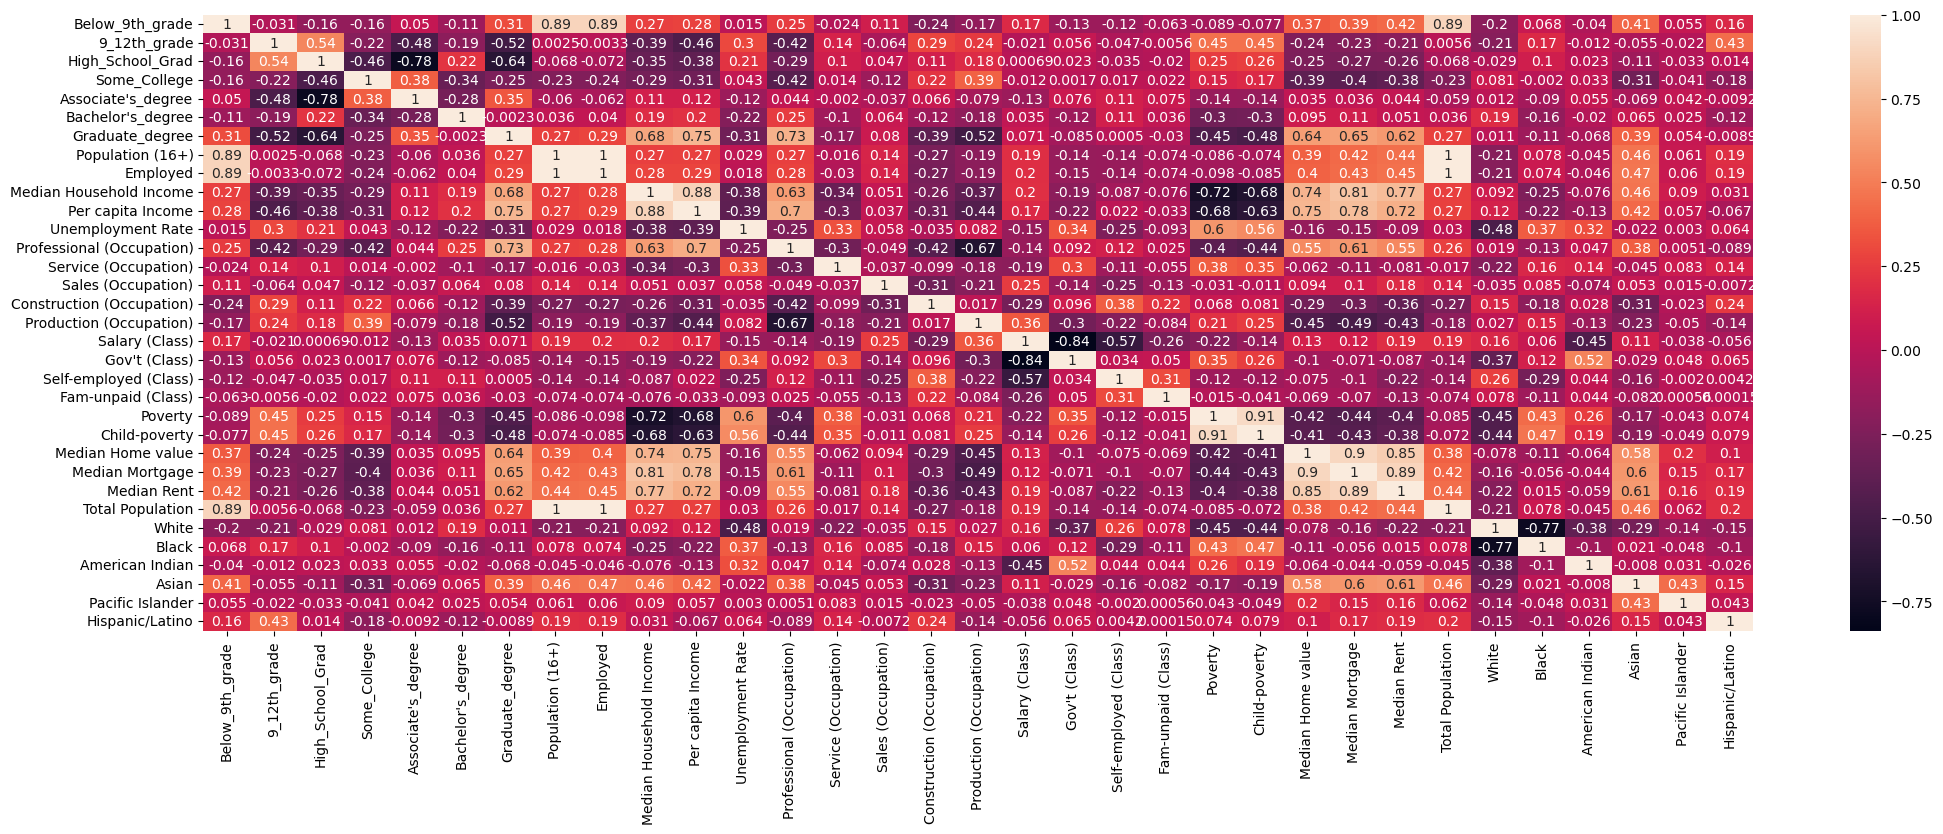

In [62]:
# Correlation Matrix
plt.figure(figsize =(25,8))
sns.heatmap(heatmap_df.corr(),annot=True)

In [81]:
census_df = census_df.drop(columns=['Child-poverty', 'Median Mortgage', 'Median Rent', 'Per capita Income'])

In [82]:
census_df.columns

Index(['Below_9th_grade', '9_12th_grade', 'High_School_Grad', 'Some_College',
       'Associate's_degree', 'Bachelor's_degree', 'Graduate_degree',
       'Population (16+)', 'Employed', 'Median Household Income',
       'Unemployment Rate', 'Professional (Occupation)',
       'Service (Occupation)', 'Sales (Occupation)',
       'Construction (Occupation)', 'Production (Occupation)',
       'Salary (Class)', 'Gov't (Class)', 'Self-employed (Class)',
       'Fam-unpaid (Class)', 'Median Home value', 'Total Population', 'White',
       'Black', 'Hispanic/Latino', 'State_Alabama', 'State_Alaska',
       'State_Arizona', 'State_Arkansas', 'State_California', 'State_Colorado',
       'State_Connecticut', 'State_Delaware', 'State_District of Columbia',
       'State_Florida', 'State_Georgia', 'State_Hawaii', 'State_Idaho',
       'State_Illinois', 'State_Indiana', 'State_Iowa', 'State_Kansas',
       'State_Kentucky', 'State_Louisiana', 'State_Maine', 'State_Maryland',
       'State_Massachus

# Splitting the data into train and test sets

In [83]:
# Setting Target Variable
X = census_df.drop(columns=['Poverty'])
y = census_df['Poverty']

# Using sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# PCA

In [241]:
from sklearn.decomposition import PCA
components = 17
pca = PCA(n_components = components)
pca_X_train = pca.fit_transform(X_train_scaled)
pca_X_test = pca.transform(X_test_scaled)

In [242]:
X_train_scaled.shape

(11739, 17)

In [243]:
pca.explained_variance_ratio_.cumsum()

array([0.25952213, 0.38461755, 0.49866134, 0.59249307, 0.65288744,
       0.69895703, 0.73666406, 0.77023069, 0.79861222, 0.825685  ,
       0.85072855, 0.87352482, 0.89120968, 0.9085438 , 0.92335803,
       0.93690235, 0.94975942])

# Linear Regression

In [84]:
from sklearn.linear_model import LinearRegression

# Create a model with scikit-learn
model = LinearRegression()

# Fit the data into the model
model.fit(X_train_scaled, y_train)

LinearRegression()

In [85]:
y_pred = model.predict(X_test_scaled)

In [86]:
r2 = skl.metrics.r2_score(y_test, y_pred)
mse = skl.metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) 

print("R-Squared Value:", round(r2, 4))
print("MSE:", round(mse, 4))
print("RMSE:",round(rmse, 4))

R-Squared Value: 0.7818
MSE: 8.264
RMSE: 2.8747


C:\Users\joshu\AppData\Local\Temp\ipykernel_25032\4149121072.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
C:\Users\joshu\AppData\Local\Temp\ipykernel_25032\4149121072.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.di

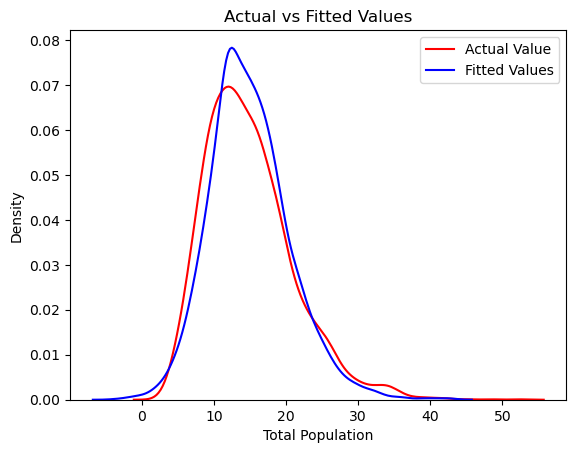

In [87]:
plt.figure()
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values')
plt.xlabel('Total Population')

plt.legend()

plt.show()
plt.close()

# Decision Tree

In [88]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state = 42)
model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

In [89]:
y_pred =model.predict(X_test_scaled)

In [90]:
r2 = skl.metrics.r2_score(y_test, y_pred)
mse = skl.metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) 

print("R-Squared Value:", round(r2, 4))
print("MSE:", round(mse, 4))
print("RMSE:",round(rmse, 4))

R-Squared Value: 0.6913
MSE: 11.6903
RMSE: 3.4191


C:\Users\joshu\AppData\Local\Temp\ipykernel_25032\4149121072.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
C:\Users\joshu\AppData\Local\Temp\ipykernel_25032\4149121072.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.di

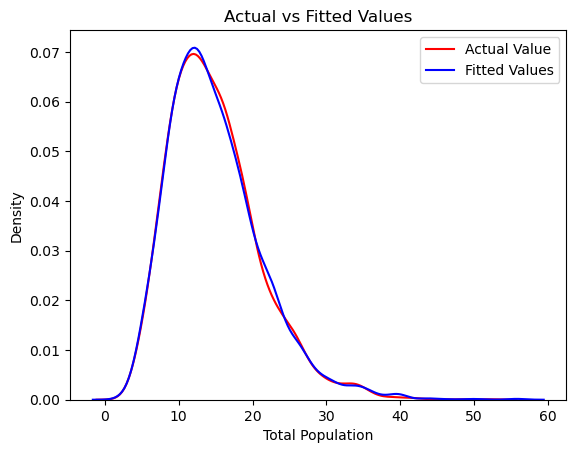

In [91]:
plt.figure()
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values')
plt.xlabel('Total Population')

plt.legend()

plt.show()
plt.close()

# Grid Search (RF Optimization)

In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
RF_param_grid = { 
    'n_estimators': [200, 300, 400, 500],
    'random_state': [42]
}
RF_GridCV = GridSearchCV(RandomForestRegressor(), RF_param_grid, cv=5, n_jobs= -1)
RF_GridCV.fit(X_train_scaled,y_train)  
print(RF_GridCV.best_params_)    
print(RF_GridCV.best_score_)

c:\Users\joshu\anaconda3\envs\dev\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\joshu\anaconda3\envs\dev\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\joshu\anaconda3\envs\dev\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\joshu\anaconda3\envs\dev\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\User

{'max_features': 'sqrt', 'n_estimators': 500, 'random_state': 42}
0.8512816707742609


# Random Forest

In [102]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 300,random_state = 42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=300, random_state=42)

In [106]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 500,random_state = 42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=500, random_state=42)

In [107]:
y_pred =model.predict(X_test_scaled)

In [108]:
r2 = skl.metrics.r2_score(y_test, y_pred)
mse = skl.metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) 

print("R-Squared Value:", round(r2, 4))
print("MSE:", round(mse, 4))
print("RMSE:",round(rmse, 4))

R-Squared Value: 0.8563
MSE: 5.4429
RMSE: 2.333


C:\Users\joshu\AppData\Local\Temp\ipykernel_25032\1398700974.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
C:\Users\joshu\AppData\Local\Temp\ipykernel_25032\1398700974.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.di

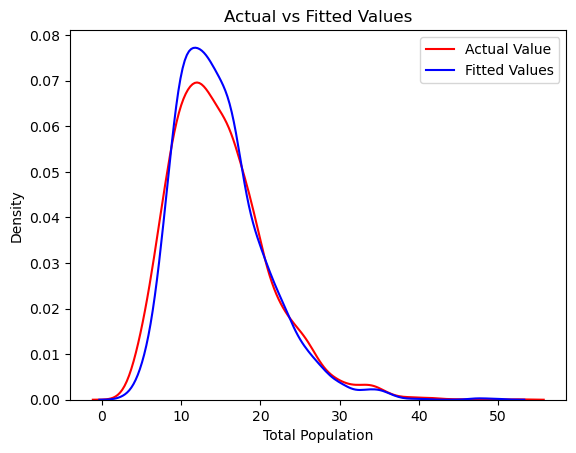

In [110]:
plt.figure()
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values')
plt.xlabel('Total Population')
plt.legend()

plt.show()
plt.close()

# Feature Importance

In [122]:
# Random Forests in sklearn will automatically calculate feature importance
importances = model.feature_importances_

# We can sort the features by their importance
sorted_features = sorted(zip(importances, X.columns), reverse=True)

# Get top 10 features
top_10_features = sorted_features[:10]

top_10_features

[(0.6590409833309129, 'Median Household Income'),
 (0.07397604181472585, 'White'),
 (0.032206691896531706, 'Employed'),
 (0.02138465735129011, 'Salary (Class)'),
 (0.019953064136158327, 'Population (16+)'),
 (0.01882976694863909, 'Total Population'),
 (0.01580377522200389, 'RaceOther'),
 (0.014699790824073545, 'Unemployment Rate'),
 (0.010123917819437151, 'Professional (Occupation)'),
 (0.01003865426803655, 'Construction (Occupation)')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

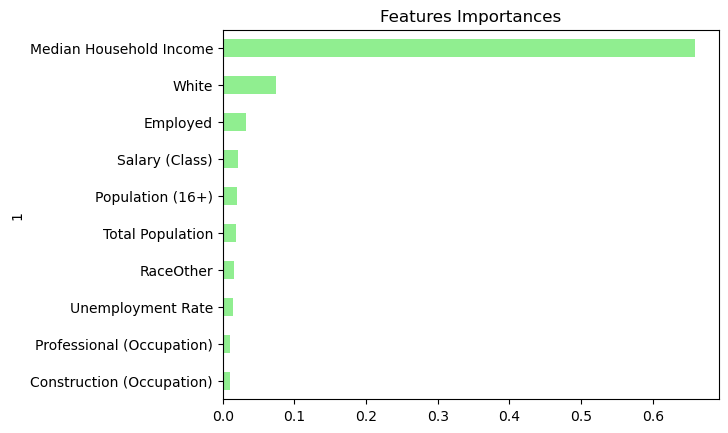

In [123]:
# Visualize the features by importance
importances_df = pd.DataFrame(top_10_features)
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

# Deep Neural Net

In [91]:
# Define the model
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  100
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 25

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features,activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

c:\Users\joshu\anaconda3\envs\dev\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 100)            │         3,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,451 (36.92 KB)

 Trainable params: 9,451 (36.92 KB)

 Non-trainable params: 0 (0.00 B)

In [92]:
# Compile the model
nn.compile(loss="mse", optimizer="adam", metrics=["R2Score"])

In [93]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 735us/step - R2Score: -4.9646 - loss: 230.5998
Epoch 2/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - R2Score: -4.8992 - loss: 228.7817
Epoch 3/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - R2Score: -4.8555 - loss: 230.1596
Epoch 4/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - R2Score: -5.0243 - loss: 227.2994
Epoch 5/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - R2Score: -4.9575 - loss: 229.0337
Epoch 6/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - R2Score: -4.9870 - loss: 226.2547  
Epoch 7/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - R2Score: -4.8347 - loss: 230.3687
Epoch 8/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - R2Score: -4.8589 - loss: 229.7662
Epoch 9/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - R2Score: -4.8619 - loss: 232.1738
Epoch 10/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - R2Score: -4.9733 - loss: 226.1533
Epoch 11/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - R2Score: -4.9924 - loss: 231.4475
E

KeyboardInterrupt: 